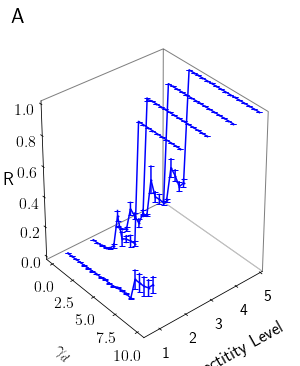

In [2]:
# import the libraries needed for plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['axes.labelsize'] = 18
rcParams['figure.titlesize'] = 14
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 18

#open the files with the data for plotting
archnp ="/home/jesus/11CellVgamma_d.npy" 
archnpGd = "/home/jesus/range_gamma_d.npy"

ejeX = np.load(archnpGd)  # load the range of values for the gamma_D parameter

valnp = np.load(archnp)    # load the results of the simulations
level = np.ones(valnp.shape[1]) # get the values correspondig tu each level for all simulations
medianp = np.mean(valnp,0)   # compute the mean of the ten simulations

array_corte = np.ones(valnp.shape[1],int)*valnp.shape[2]  # select the range of values for plotting for each level

Z=np.zeros([1,valnp.shape[1]])   
Z[0,:] = medianp[:,valnp.shape[2]-1]  # storage the mean of each level into the variable Z.

# define the figure size according with number of levels
tamfig = (15,6)
if valnp.shape[1] == 5: tamfig = (5,6)
if valnp.shape[1] == 10: tamfig = (10,6)
fig = plt.figure(figsize=tamfig)
ax = fig.gca(projection='3d')

# compute the standar error
err = np.std(valnp, 0)/np.sqrt(valnp.shape[0])

X=ejeX
Y=level
ZZ=medianp

YY,YYY=np.meshgrid(range(1,valnp.shape[2]+1),range(1,valnp.shape[1]+1))

# plot the mean for each level 
for i in range(valnp.shape[1]): 
     ax.plot3D(ejeX[0:array_corte[i]],YYY[i,0:array_corte[i]],medianp[i,0:array_corte[i]], '-o', ms=1, color='b', label="level "+str(i+1)) 

# plot the error bars
for j1 in range(valnp.shape[1]):
 for i1 in range(valnp.shape[2]): 
    ax.plot3D([X[i1],X[i1]], [Y[j1]*(j1+1),Y[j1]*(j1+1)],[ZZ[j1,i1]-err[j1,i1],ZZ[j1,i1]+err[j1,i1]], '-_',color='b') 

# define the lilmits for each axis
ax.set_zlim(0, 1.0)
ax.set_ylim(0.5, valnp.shape[1])

# define the y-value according to the connectivity level
if valnp.shape[1] == 5:  ax.set_yticklabels(['1','2','3','4','5'])
if valnp.shape[1] == 10: ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10'])
if valnp.shape[1] == 20: ax.set_yticklabels(['2','4','6','8','10','12','14','16','18','20','11','12','13','14','15','16','17','18','19','20'])

#define the title and labels according to the connectivity level
inciso = 'A'
if valnp.shape[1]==10: inciso='B'
if valnp.shape[1]==20: inciso='C'
ax.set_ylabel("Connectitity Level", labelpad=15)
ax.set_title(inciso, loc="left")
ax.set_zlabel("R")
ax.set_xlabel("$\gamma_{d}$",labelpad=20)

#assing the atributes of the figure according to the connectiviy level
bins = valnp.shape[1]
if valnp.shape[1]==20: bins=bins/2
locatorx = matplotlib.ticker.MaxNLocator(nbins=5)
locatory = matplotlib.ticker.MaxNLocator(nbins=bins)
locatorz = matplotlib.ticker.MaxNLocator(nbins=5)
ax.xaxis.set_major_locator(locatorx)
ax.yaxis.set_major_locator(locatory)
ax.zaxis.set_major_locator(locatorz)

ax.grid(False)
ax.w_zaxis.gridlines.set_lw(3.0)

ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_color('white')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
#
tmp_planes = ax.xaxis._PLANES 

ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])
view_1 = (30, -40)  #(25,-135)
view_2 = (15, 110)  #(25,-45)
init_view = view_1
ax.view_init(*init_view)

plt.show()